In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install -Uq diffusers transformers fastcore



In [3]:
import logging
from pathlib import Path
import matplotlib.pyplot as plt
import torch 
from diffusers import StableDiffusionPipeline  
from fastcore.all import concat 
from huggingface_hub import  notebook_login
from PIL import Image
logging.disable(logging.WARNING)
torch.manual_seed(1)
if not (Path.home()/'.cache/huggingface'/'token').exists(): notebook_login()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [4]:
def image_grid(imgs,rows,cols):
    w,h = imgs[0].size
    grid=Image.new("RGB",size=(cols*w,rows*h))
    for i , img in enumerate(imgs):grid.paste(img,box=(i%cols*w,i//cols*h))
    return grid

In [5]:
from diffusers import StableDiffusionImg2ImgPipeline
from fastdownload import FastDownload
pipe = StableDiffusionImg2ImgPipeline.from_pretrained("CompVis/stable-diffusion-v1-4",
                                                      revision='fp16',
                                                      torch_dtype=torch.float16,).to("cuda")
pipe.enable_attention_slicing()

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


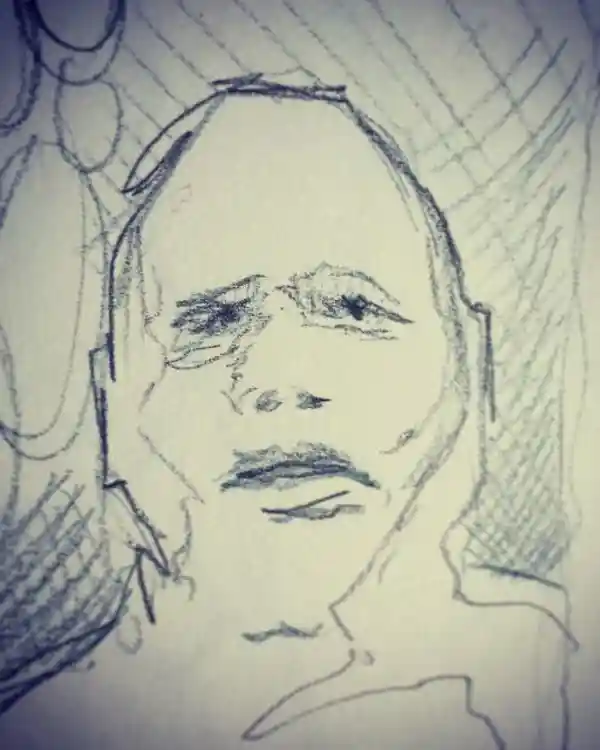

In [6]:
p=FastDownload().download('https://i.guim.co.uk/img/media/846cbc6489c031362413af3f79a315b112b10ea2/52_0_512_640/master/512.jpg?width=300&quality=45&auto=format&fit=max&dpr=2&s=76af6e5d6e7a6400399d6e1771dee3a7')
init_image=Image.open(p).convert("RGB")
init_image

/opt/conda/lib/python3.10/site-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion_img2img.py:545: FutureWarning: You have passed 3 text prompts (`prompt`), but only 1 initial images (`image`). Initial images are now duplicating to match the number of text prompts. Note that this behavior is deprecated and will be removed in a version 1.0.0. Please make sure to update your script to pass as many initial images as text prompts to suppress this warning.
  deprecate("len(prompt) != len(image)", "1.0.0", deprecation_message, standard_warn=False)


  0%|          | 0/40 [00:00<?, ?it/s]

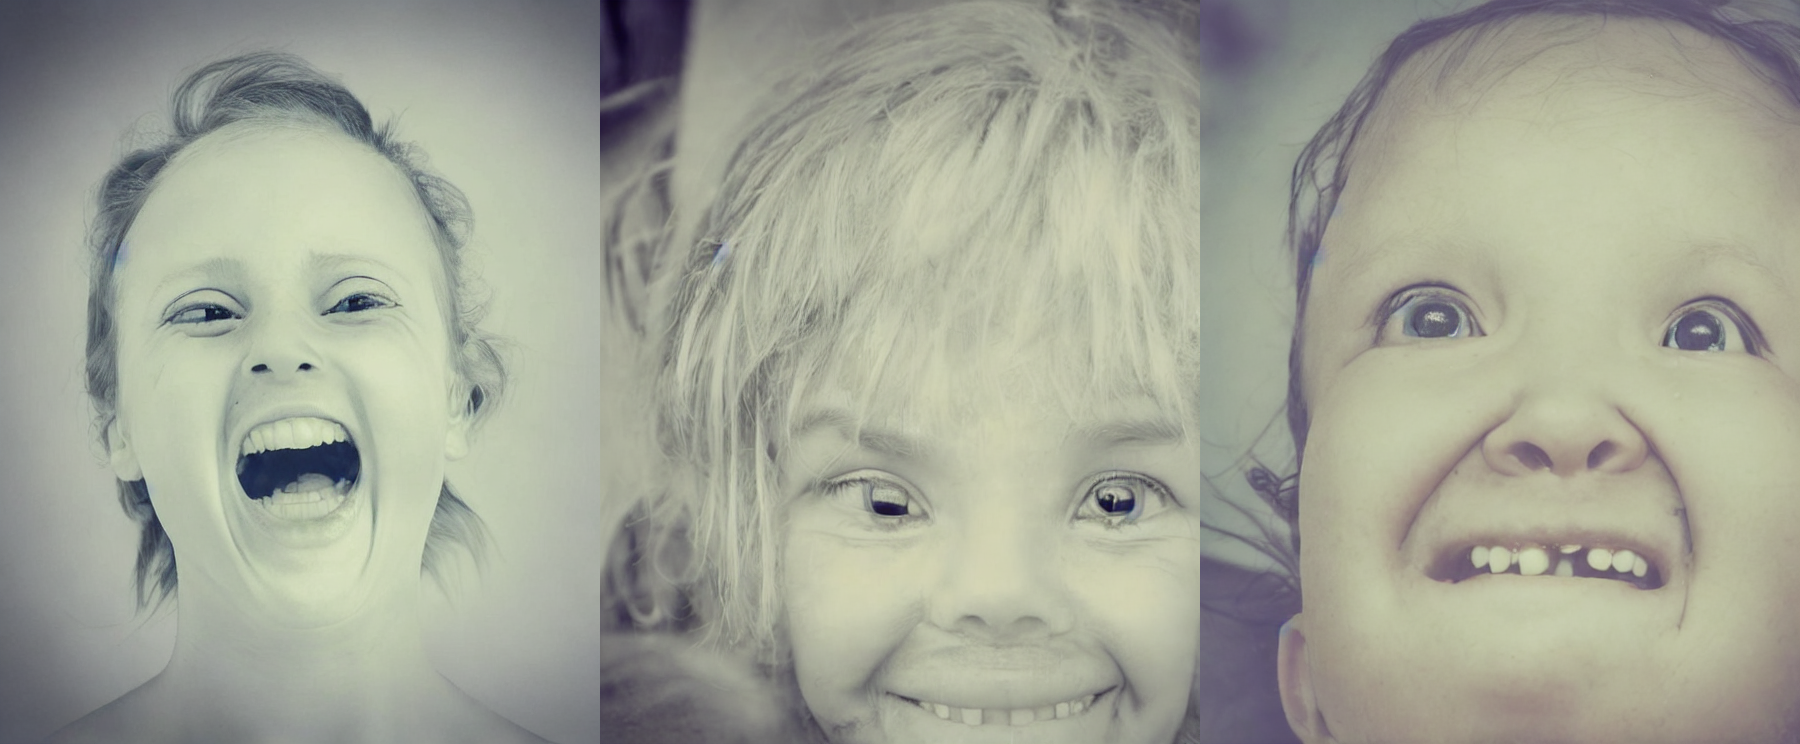

In [7]:
torch.manual_seed(100)
prompt="face of a human in  joy"
images=pipe(prompt=prompt,num_images_per_prompt=3,image=init_image,strength=0.8,num_inference_steps=50).images
image_grid(images,rows=1,cols=3)

In [8]:
init_image=images[2]

  0%|          | 0/70 [00:00<?, ?it/s]

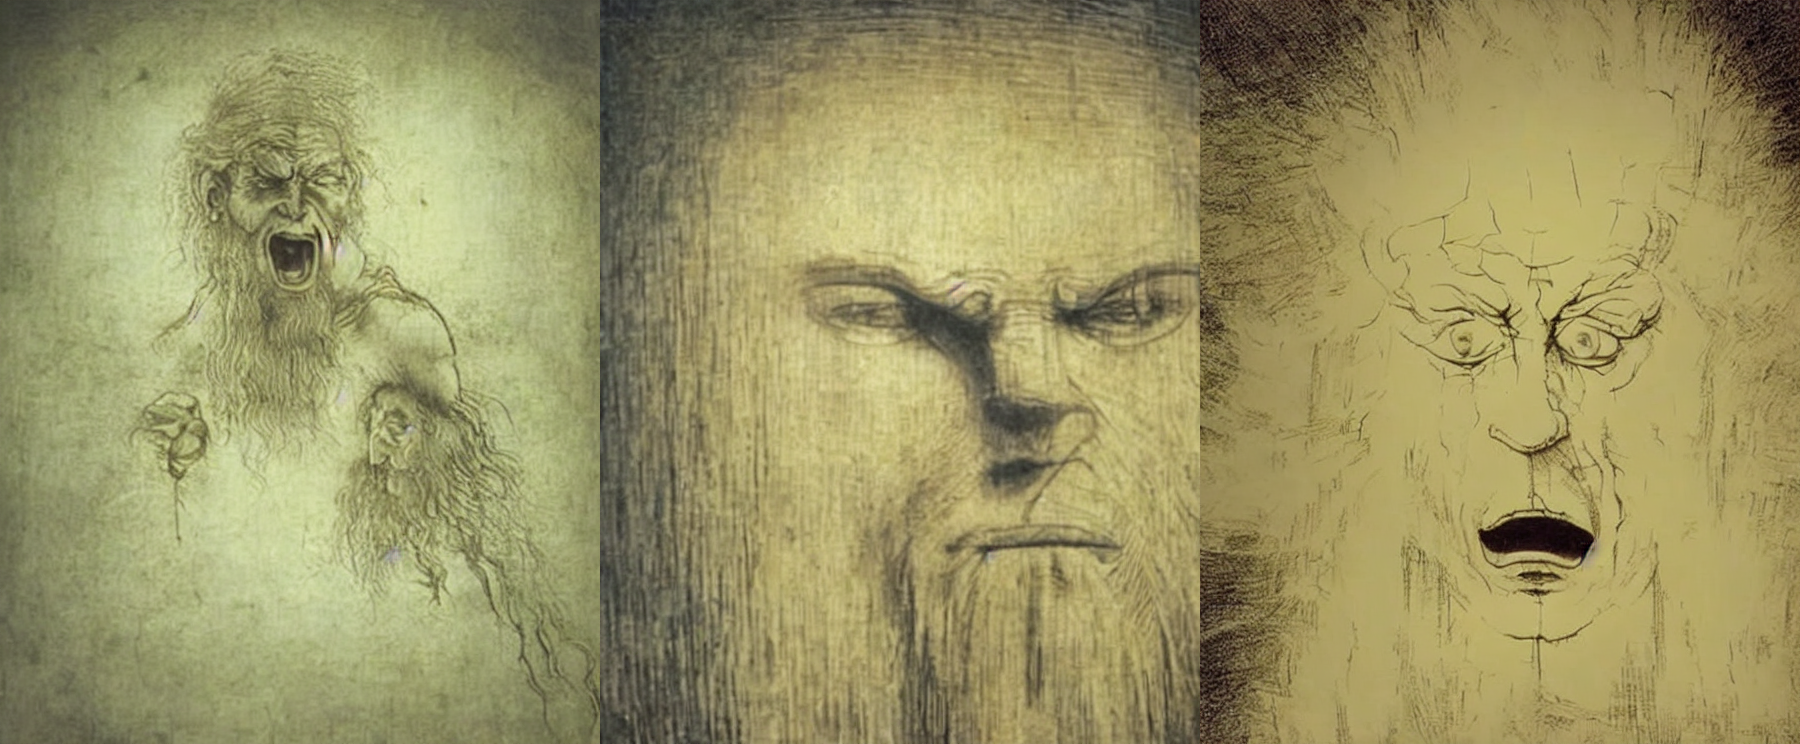

In [10]:
torch.manual_seed(1000)
prompt="electronic art   of an angry human by Leonardo da Vinci"
images=pipe(prompt=prompt,num_images_per_prompt=3,image=init_image,strength=1,num_inference_steps=70).images
image_grid(images,rows=1,cols=3)